## 1.Tools for text processing

Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

What are the most frequent words  and how often do they occur?

https://www.gutenberg.org/cache/epub/11/pg11-images.html

utf-8 : https://www.gutenberg.org/cache/epub/11/pg11.txt

The Data Science pipeline we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.

Let's start by loading in the three main Python packages we are going to use.

In [2]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

## 2. GETting the data with request()

In [3]:
# Getting the Moby Dick HTML 
r = requests.get("https://www.gutenberg.org/cache/epub/11/pg11.txt")

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
html[:2000]

"\ufeffThe Project Gutenberg eBook of Alice's Adventures in Wonderland\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Alice's Adventures in Wonderland\r\n\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease date: June 27, 2008 [eBook #11]\r\n                Most recently updated: March 30, 2021\r\n\r\nLanguage: English\r\n\r\nCredits: Arthur DiBianca and David Widger\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r\n\r\nby Lewis Carroll\r\n\r\nTHE MILLE

## 3. Get the text of the book

Getting rid of the html wrappers and extracting only the text. 

In [4]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html,"lxml")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
text[32000:34000]

' but the Mouse only\r\nshook its head impatiently, and walked a little quicker.\r\n\r\n“What a pity it wouldn’t stay!” sighed the Lory, as soon as it was\r\nquite out of sight; and an old Crab took the opportunity of saying to\r\nher daughter “Ah, my dear! Let this be a lesson to you never to lose\r\n_your_ temper!” “Hold your tongue, Ma!” said the young Crab, a little\r\nsnappishly. “You’re enough to try the patience of an oyster!”\r\n\r\n“I wish I had our Dinah here, I know I do!” said Alice aloud,\r\naddressing nobody in particular. “She’d soon fetch it back!”\r\n\r\n“And who is Dinah, if I might venture to ask the question?” said the\r\nLory.\r\n\r\nAlice replied eagerly, for she was always ready to talk about her pet:\r\n“Dinah’s our cat. And she’s such a capital one for catching mice you\r\ncan’t think! And oh, I wish you could see her after the birds! Why,\r\nshe’ll eat a little bird as soon as look at it!”\r\n\r\nThis speech caused a remarkable sensation among the party. Some 

In [6]:
text[0:50]

"The Project Gutenberg eBook of Alice's Adventures "

## 4. Extract words

Tokenizing the text will remove unwanted puctuation and will help to count specific words. 

In [7]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text=text)

# Printing out the first 8 words / tokens 
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Alice', 's', 'Adventures']

In [8]:
# A new list to hold the lowercased words
words = [token.lower() for token in tokens]

# Printing out the first 8 words / tokens 
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 's', 'adventures']

### We remove common words known from the english disctionary

The English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <b>stop words</b>. The package `nltk` includes a good list of stop words in English that we can use.

In [10]:
nltk.download('stopwords')

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
sw[:8]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ekritsin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [12]:
# A new list to hold with No Stop words
words_ns = [word for word in words if word not in sw]

# Printing the first 5 words_ns to check that stop words are gone
words_ns[:5]

['project', 'gutenberg', 'ebook', 'alice', 'adventures']

## 5. Let's count the common words

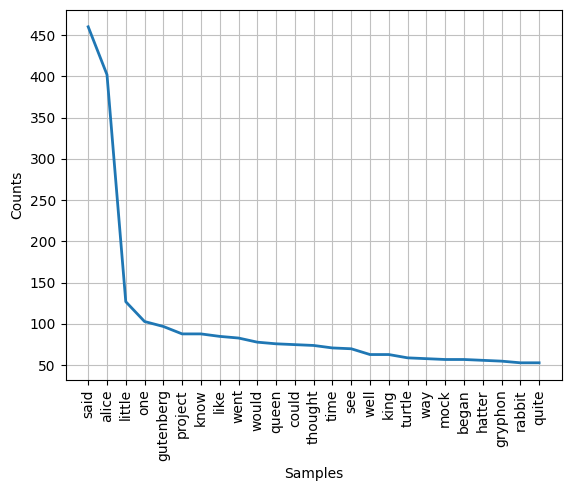

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [13]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## 6. Let's tune the stop words a bit

It seems like the most common word is said and then Alice. I would say this is predictable . 

However, noticing so many words that could be stop words make me think that we could discover more common words that do not belong to _said_, _like_ , _would_ , _could_, _quite_ . 



In [38]:
new_sw = ["said", "like", "would", "could", "quite"]

# A new list to hold with No Stop words
words_ns_ext = [word for word in words_ns if word not in new_sw]

# Printing the first 5 words_ns to check that stop words are gone
words_ns_ext[:5]

['project', 'gutenberg', 'ebook', 'alice', 'adventures']

In [53]:
len(words_ns), len(words_ns_ext)

(14298, 13547)

In [56]:
len([w for w in words_ns_ext if w=="alice"]) , len([w for w in words_ns if w=="alice"])

(402, 402)

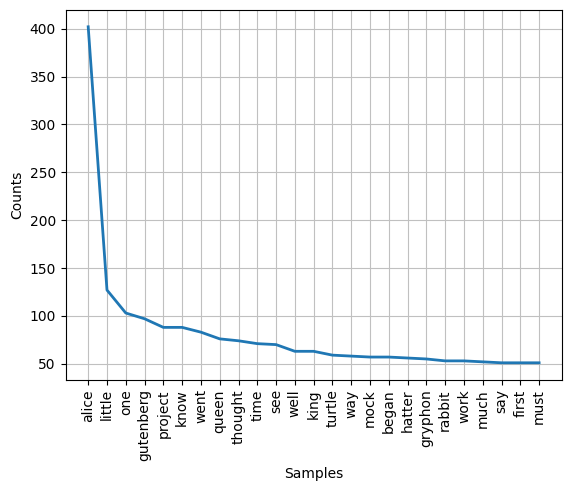

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [39]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns_ext)

# Plotting the word frequency distribution
freqdist.plot(25)

In [18]:
freqdist.most_common(50)

[('alice', 402),
 ('little', 127),
 ('one', 103),
 ('gutenberg', 97),
 ('project', 88),
 ('know', 88),
 ('went', 83),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 59),
 ('way', 58),
 ('mock', 57),
 ('began', 57),
 ('hatter', 56),
 ('gryphon', 55),
 ('rabbit', 53),
 ('work', 53),
 ('much', 52),
 ('say', 51),
 ('first', 51),
 ('must', 51),
 ('head', 50),
 ('go', 50),
 ('think', 49),
 ('thing', 49),
 ('voice', 48),
 ('come', 47),
 ('get', 46),
 ('never', 46),
 ('1', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('mouse', 44),
 ('duchess', 42),
 ('round', 41),
 ('came', 40),
 ('tone', 40),
 ('dormouse', 40),
 ('great', 39),
 ('back', 39),
 ('two', 38),
 ('cat', 37),
 ('right', 36),
 ('march', 35),
 ('long', 34)]

In [20]:
print(freqdist)

<FreqDist with 2992 samples and 13547 outcomes>


## 7.Which is the longest word in the book?

Here we are checking words that are longer than 10 characters .

In [22]:
# lets get the unique words in the text
V = set(words_ns_ext)

long_words = [word for word in V if len(word) > 10]
sorted(long_words)

['_curtseying_',
 '_everybody_',
 '_something_',
 '_somewhere_',
 '_un_important',
 'accidentally',
 'affectionately',
 'alternately',
 'antipathies',
 'beautifully',
 'caterpillar',
 'circumstances',
 'comfortable',
 'comfortably',
 'compilation',
 'complaining',
 'confirmation',
 'consequential',
 'considerable',
 'considering',
 'consultation',
 'contemptuous',
 'contemptuously',
 'contradicted',
 'contributions',
 'conversation',
 'conversations',
 'corporation',
 'desperately',
 'difficulties',
 'disappeared',
 'disappointment',
 'disclaimers',
 'discontinue',
 'distraction',
 'distributed',
 'distributing',
 'distribution',
 'distributor',
 'downloading',
 'educational',
 'electronically',
 'encouraging',
 'exclamation',
 'executioner',
 'explanation',
 'explanations',
 'extraordinary',
 'fortunately',
 'frontispiece',
 'generations',
 'handwriting',
 'hippopotamus',
 'identification',
 'illustration',
 'immediately',
 'impatiently',
 'impertinent',
 'incessantly',
 'indignantly'

### It looks like we got some more descriptive words. 

Let's which is the frequency of those words occurring in the text. 

In [24]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(long_words)

freqdist.most_common()

[('inquisitively', 1),
 ('desperately', 1),
 ('downloading', 1),
 ('unfortunate', 1),
 ('incessantly', 1),
 ('practically', 1),
 ('contemptuous', 1),
 ('proprietary', 1),
 ('occasionally', 1),
 ('executioner', 1),
 ('comfortably', 1),
 ('redistributing', 1),
 ('distribution', 1),
 ('prominently', 1),
 ('generations', 1),
 ('unenforceability', 1),
 ('thoughtfully', 1),
 ('difficulties', 1),
 ('antipathies', 1),
 ('explanations', 1),
 ('international', 1),
 ('transcription', 1),
 ('_everybody_', 1),
 ('shakespeare', 1),
 ('consequential', 1),
 ('neighbouring', 1),
 ('illustration', 1),
 ('extraordinary', 1),
 ('interesting', 1),
 ('disclaimers', 1),
 ('considering', 1),
 ('contradicted', 1),
 ('interpreted', 1),
 ('refreshments', 1),
 ('contributions', 1),
 ('quarrelling', 1),
 ('particularly', 1),
 ('northumbria', 1),
 ('_un_important', 1),
 ('impatiently', 1),
 ('impertinent', 1),
 ('respectable', 1),
 ('unimportant', 1),
 ('contemptuously', 1),
 ('electronically', 1),
 ('unwillingly',

#### Looks like the longest and much more descriptive words are being used only once in the text ! 

## 8. Bigrams

A collocation is a sequence of words that occur together unusually often.

Which words are beeing use more often together in _Alice in Wonderland_ ?

    biagrams : list of word pairs

In [28]:
list(nltk.bigrams(words_ns_ext))

[('project', 'gutenberg'),
 ('gutenberg', 'ebook'),
 ('ebook', 'alice'),
 ('alice', 'adventures'),
 ('adventures', 'wonderland'),
 ('wonderland', 'ebook'),
 ('ebook', 'use'),
 ('use', 'anyone'),
 ('anyone', 'anywhere'),
 ('anywhere', 'united'),
 ('united', 'states'),
 ('states', 'parts'),
 ('parts', 'world'),
 ('world', 'cost'),
 ('cost', 'almost'),
 ('almost', 'restrictions'),
 ('restrictions', 'whatsoever'),
 ('whatsoever', 'may'),
 ('may', 'copy'),
 ('copy', 'give'),
 ('give', 'away'),
 ('away', 'use'),
 ('use', 'terms'),
 ('terms', 'project'),
 ('project', 'gutenberg'),
 ('gutenberg', 'license'),
 ('license', 'included'),
 ('included', 'ebook'),
 ('ebook', 'online'),
 ('online', 'www'),
 ('www', 'gutenberg'),
 ('gutenberg', 'org'),
 ('org', 'located'),
 ('located', 'united'),
 ('united', 'states'),
 ('states', 'check'),
 ('check', 'laws'),
 ('laws', 'country'),
 ('country', 'located'),
 ('located', 'using'),
 ('using', 'ebook'),
 ('ebook', 'title'),
 ('title', 'alice'),
 ('alice', 

In [58]:
text1 = nltk.Text(words_ns_ext)


text1.concordance('alice')

Displaying 25 of 402 matches:
project gutenberg ebook alice adventures wonderland ebook use anyo
ws country located using ebook title alice adventures wonderland author lewis c
widger start project gutenberg ebook alice adventures wonderland illustration a
e adventures wonderland illustration alice adventures wonderland lewis carroll 
e chapter xi stole tarts chapter xii alice evidence chapter rabbit hole alice b
i alice evidence chapter rabbit hole alice beginning get tired sitting sister b
tures conversations use book thought alice without pictures conversations consi
 ran close nothing _very_ remarkable alice think _very_ much way hear rabbit sa
tch waistcoat pocket_ looked hurried alice started feet flashed across mind nev
abbit hole hedge another moment went alice never considering world get rabbit h
 tunnel way dipped suddenly suddenly alice moment think stopping found falling 
one cupboards fell past well thought alice fall shall think nothing tumbling st
et see four thousand mi

In [59]:
text1.concordance('queen')

Displaying 25 of 76 matches:
apter vii mad tea party chapter viii queen croquet ground chapter ix mock turtl
aying solemn tone duchess invitation queen play croquet frog footman repeated s
emn tone changing order words little queen invitation duchess play croquet bowe
spoke must go get ready play croquet queen hurried room cook threw frying pan w
growling alice call cat play croquet queen day much alice invited yet see cat v
spoon march hare great concert given queen hearts sing twinkle twinkle little b
l hardly finished first verse hatter queen jumped bawled murdering time head dr
wer beds cool fountains chapter viii queen croquet ground large rose tree stood
thers _you d_ better talk five heard queen say yesterday deserved beheaded one 
red_ rose tree put white one mistake queen find heads cut know see miss best af
xiously looking across garden called queen queen three gardeners instantly thre
y looking across garden called queen queen three gardeners instantly threw flat
otsteps ali

In [51]:
text1.collocation_list()

[('project', 'gutenberg'),
 ('mock', 'turtle'),
 ('march', 'hare'),
 ('white', 'rabbit'),
 ('united', 'states'),
 ('literary', 'archive'),
 ('archive', 'foundation'),
 ('electronic', 'works'),
 ('gutenberg', 'electronic'),
 ('join', 'dance'),
 ('gutenberg', 'literary'),
 ('soo', 'oop'),
 ('minute', 'two'),
 ('set', 'forth'),
 ('thought', 'alice'),
 ('beautiful', 'soup'),
 ('terms', 'agreement'),
 ('gutenberg', 'org'),
 ('www', 'gutenberg'),
 ('electronic', 'work')]

#### We can visualize the position and number of occurrences of the words in a text corpus.

Each row represents the entire text. 

You can see in what part of th book the charackters are mentioned.

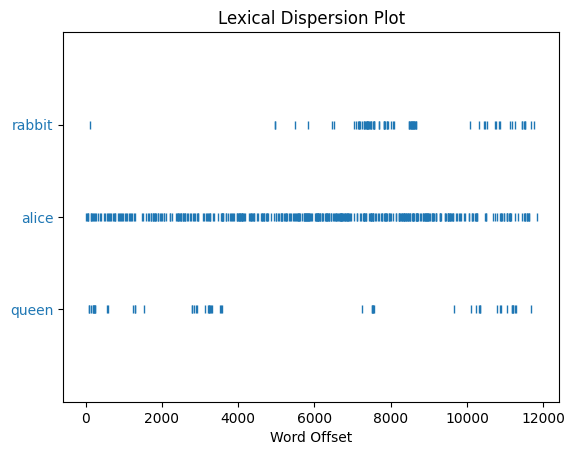

In [66]:
text1.dispersion_plot(["queen",'alice', 'rabbit'])

## 9.Sentiment analysis of the sentences

Let's seprate the text into sentences. 

In [80]:
nltk.download('punkt')

sentences = nltk.tokenize.sent_tokenize(text)

sentences[45:50]

[nltk_data] Downloading package punkt to /home/ekritsin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I wish you were down here with me!',
 'There are\r\nno mice in the air, I’m afraid, but you might catch a bat, and that’s\r\nvery like a mouse, you know.',
 'But do cats eat bats, I wonder?” And here\r\nAlice began to get rather sleepy, and went on saying to herself, in a\r\ndreamy sort of way, “Do cats eat bats?',
 'Do cats eat bats?” and\r\nsometimes, “Do bats eat cats?” for, you see, as she couldn’t answer\r\neither question, it didn’t much matter which way she put it.',
 'She felt\r\nthat she was dozing off, and had just begun to dream that she was\r\nwalking hand in hand with Dinah, and saying to her very earnestly,\r\n“Now, Dinah, tell me the truth: did you ever eat a bat?” when suddenly,\r\nthump!']

In [85]:
sentences_strip = [sentence.replace("\r\n", " ") for sentence in sentences]

sentences_strip[49]

'She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, “Now, Dinah, tell me the truth: did you ever eat a bat?” when suddenly, thump!'

#### The pretrained model of nltk will help us with the Sentiment Analysis

In [68]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ekritsin/nltk_data...


In [86]:
sia.polarity_scores(sentences_strip[49])

{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8748}

Let's make a Dataframe with the results overview.

In [87]:
import pandas as pd

In [94]:
ds = list(map(lambda x: sia.polarity_scores(x),sentences_strip))

In [97]:
sentiment = pd.DataFrame(ds)

sentiment["sentences"] =  sentences_strip

Let's test the negative sentiment of a score higher than 0.5 , which means the text will be more than 50% negtive. 

In [100]:
sentiment[sentiment.neg > 0.5]

,neg,neu,pos,compound,sentences
9,0.516,0.484,0.0,-0.4939,A Mad Tea-Party CHAPTER VIII.
88,0.772,0.228,0.0,-0.5255,Poor Alice!
372,1.000,0.000,0.0,-0.5707,"No, no!"
440,0.759,0.241,0.0,-0.6486,"No, there were no tears."
459,0.762,0.238,0.0,-0.4939,I’m mad.
510,0.730,0.270,0.0,-0.6597,Alice felt dreadfully puzzled.
528,0.506,0.494,0.0,-0.4767,The Hatter shook his head mournfully.
802,0.714,0.286,0.0,-0.3595,"“No, no!"
962,0.512,0.488,0.0,-0.4939,The Knave shook his head sadly.
972,0.589,0.411,0.0,-0.6486,There was a dead silence.


The pretrained model did quite well at classifying the sentences .

The `polarity_scores` method of the `SentimentIntensityAnalyzer` returns a dictionary with four sentiment scores:

`neg`: This score represents the negativity of the text. It's a value between 0 and 1, where 0 means there is no negative sentiment in the text, and 1 means the text is entirely negative. In the line 972, it's 0.589, which means the text contains almost 60% text that is negative sentiment.

`neu`: This score represents the neutrality of the text. It's 0.411, indicating that a portion of the text is neutral.

`pos`: This score represents the positivity of the text. It's 0.0, suggesting that the text does not contain positive sentiment.

`compound`: This is a compound sentiment score that is calculated based on the previous three scores. It provides an overall sentiment score that considers both the positive and negative sentiments in the text. In this example, the compound score is -0.6486, which is a negative value, indicating that the overall sentiment of the text is negative(it's range is -1 to 1).


Like this we could find the most common negative words and make metrics by finding statistics like how many correct labeled sentences we have flagged. 

Or find colocations of positive or negative words and expand our features to train a new customized model! 
